In [1]:
# Step 1: Load and inspect the training dataset

import pandas as pd

# Load the CSV file
train_df = pd.read_csv("DIA_trainingset_RDKit_descriptors.csv")

# Display basic info
print("Shape of the dataset:", train_df.shape)
print("\nColumn names:")
print(train_df.columns.tolist())

print("\nData types and non-null counts:")
print(train_df.info())

print("\nFirst 5 rows:")
print(train_df.head())

print("\nSummary statistics for numerical features:")
print(train_df.describe())

print("\nLabel distribution:")
print(train_df['Label'].value_counts())


Shape of the dataset: (477, 198)

Column names:
['Label', 'SMILES', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHete

DATA QUALITY CHECK

Missing values per column:
No missing values found!

Duplicate rows: 0

Zero variance features:
Found 17 zero variance features
['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'VSA_EState1', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7'] ...

CLASS DISTRIBUTION ANALYSIS

Class distribution:
Label
0    359
1    118
Name: count, dtype: int64

Class balance ratio: 3.04:1 (Negative:Positive)
Positive class percentage: 24.74%


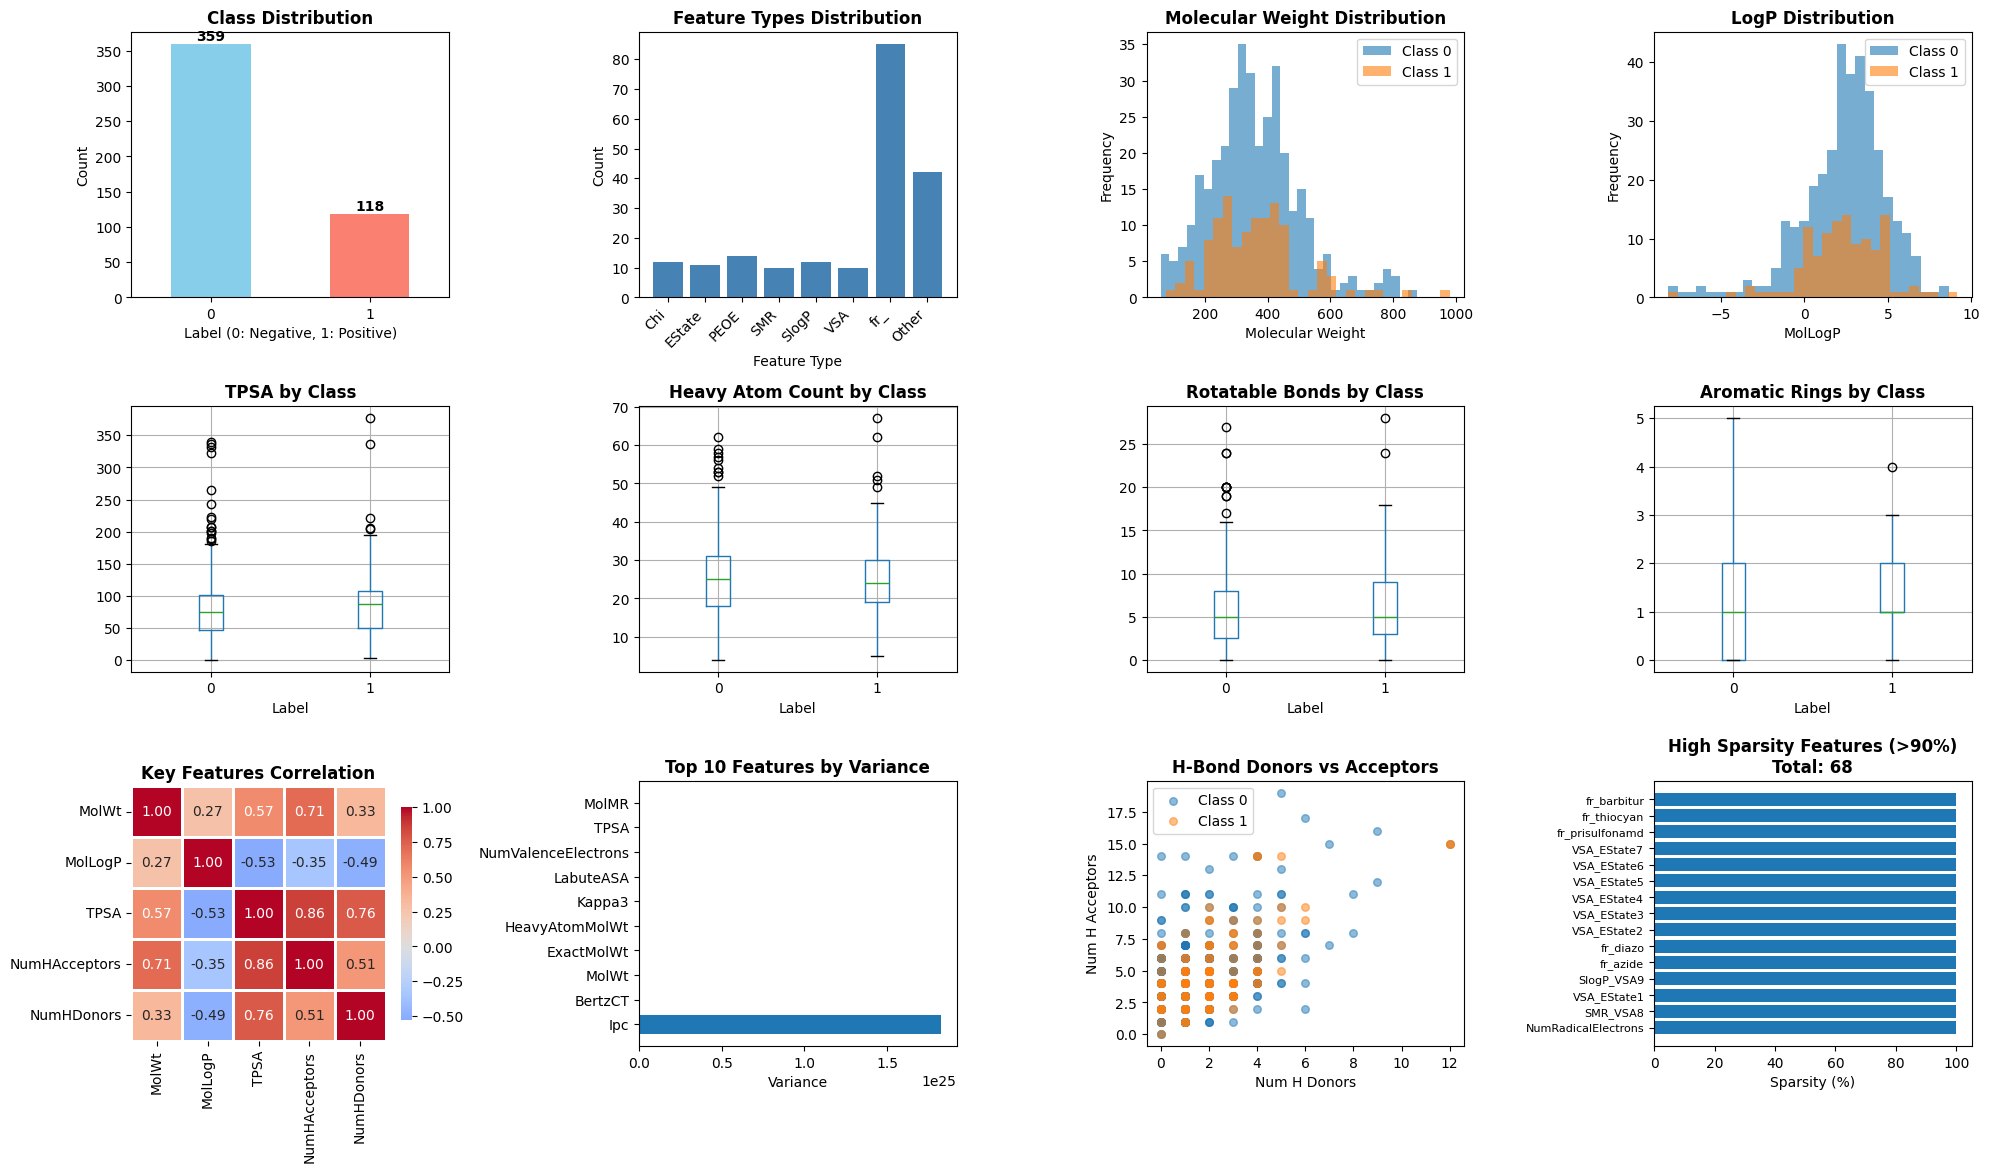

FEATURE STATISTICS

Total features: 196
Zero variance features: 17
High sparsity features (>90% zeros): 68
Low variance features (var < 0.01): 27

KEY MOLECULAR PROPERTIES COMPARISON

          Property  Class_0_Mean  Class_1_Mean  Difference  P_Value Significant
            MolWt    359.105850    360.593585    1.487735 0.923216          No
          MolLogP      2.354772      2.278907   -0.075865 0.777586          No
             TPSA     83.227967     90.634153    7.406186 0.201353          No
    NumHAcceptors      4.891365      5.000000    0.108635 0.733833          No
       NumHDonors      1.852368      2.203390    0.351022 0.061564          No
NumRotatableBonds      5.732591      6.322034    0.589443 0.224167          No
 NumAromaticRings      1.387187      1.483051    0.095864 0.428984          No
   HeavyAtomCount     24.849582     25.296610    0.447028 0.677231          No

NEXT STEPS RECOMMENDATION

1. Remove zero variance features
2. Consider removing high sparsity features

In [2]:
# Step 2: Data Exploration and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
train_df = pd.read_csv("DIA_trainingset_RDKit_descriptors.csv")

# Separate features and target
X = train_df.drop(['Label', 'SMILES'], axis=1)
y = train_df['Label']

print("DATA QUALITY CHECK")

# Check for missing values
print("\nMissing values per column:")
missing = train_df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

# Check for duplicate rows
print(f"\nDuplicate rows: {train_df.duplicated().sum()}")

# Check for zero variance features
print("\nZero variance features:")
zero_var = X.columns[X.var() == 0]
print(f"Found {len(zero_var)} zero variance features")
if len(zero_var) > 0:
    print(zero_var.tolist()[:10], "..." if len(zero_var) > 10 else "")

print("\nCLASS DISTRIBUTION ANALYSIS")

# Detailed class distribution
print("\nClass distribution:")
print(y.value_counts())
print(f"\nClass balance ratio: {y.value_counts()[0]/y.value_counts()[1]:.2f}:1 (Negative:Positive)")
print(f"Positive class percentage: {(y.sum()/len(y))*100:.2f}%")

# Visualizations
fig = plt.figure(figsize=(20, 12))

# 1. Class distribution
plt.subplot(3, 4, 1)
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Label (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(y.value_counts()):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

# 2. Distribution of number of features by molecular descriptor type
plt.subplot(3, 4, 2)
feature_types = {
    'Chi': [col for col in X.columns if col.startswith('Chi')],
    'EState': [col for col in X.columns if col.startswith('EState')],
    'PEOE': [col for col in X.columns if col.startswith('PEOE')],
    'SMR': [col for col in X.columns if col.startswith('SMR')],
    'SlogP': [col for col in X.columns if col.startswith('SlogP')],
    'VSA': [col for col in X.columns if col.startswith('VSA')],
    'fr_': [col for col in X.columns if col.startswith('fr_')],
    'Other': [col for col in X.columns if not any(col.startswith(p) for p in ['Chi', 'EState', 'PEOE', 'SMR', 'SlogP', 'VSA', 'fr_'])]
}
type_counts = {k: len(v) for k, v in feature_types.items()}
plt.bar(type_counts.keys(), type_counts.values(), color='steelblue')
plt.title('Feature Types Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Feature Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# 3. Distribution of molecular weight by class
plt.subplot(3, 4, 3)
for label in [0, 1]:
    plt.hist(train_df[train_df['Label']==label]['MolWt'], alpha=0.6, 
             label=f'Class {label}', bins=30)
plt.title('Molecular Weight Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')
plt.legend()

# 4. Distribution of LogP by class
plt.subplot(3, 4, 4)
for label in [0, 1]:
    plt.hist(train_df[train_df['Label']==label]['MolLogP'], alpha=0.6, 
             label=f'Class {label}', bins=30)
plt.title('LogP Distribution', fontsize=12, fontweight='bold')
plt.xlabel('MolLogP')
plt.ylabel('Frequency')
plt.legend()

# 5. Box plot: TPSA by class
plt.subplot(3, 4, 5)
train_df.boxplot(column='TPSA', by='Label', ax=plt.gca())
plt.title('TPSA by Class', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Label')

# 6. Box plot: HeavyAtomCount by class
plt.subplot(3, 4, 6)
train_df.boxplot(column='HeavyAtomCount', by='Label', ax=plt.gca())
plt.title('Heavy Atom Count by Class', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Label')

# 7. Box plot: NumRotatableBonds by class
plt.subplot(3, 4, 7)
train_df.boxplot(column='NumRotatableBonds', by='Label', ax=plt.gca())
plt.title('Rotatable Bonds by Class', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Label')

# 8. Box plot: NumAromaticRings by class
plt.subplot(3, 4, 8)
train_df.boxplot(column='NumAromaticRings', by='Label', ax=plt.gca())
plt.title('Aromatic Rings by Class', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Label')

# 9. Correlation between key features
plt.subplot(3, 4, 9)
key_features = ['MolWt', 'MolLogP', 'TPSA', 'NumHAcceptors', 'NumHDonors']
corr = train_df[key_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, 
            linewidths=1, fmt='.2f', cbar_kws={"shrink": 0.8})
plt.title('Key Features Correlation', fontsize=12, fontweight='bold')

# 10. Feature value ranges (top 10 features by variance)
plt.subplot(3, 4, 10)
top_var_features = X.var().nlargest(10)
plt.barh(range(len(top_var_features)), top_var_features.values)
plt.yticks(range(len(top_var_features)), top_var_features.index)
plt.xlabel('Variance')
plt.title('Top 10 Features by Variance', fontsize=12, fontweight='bold')
plt.tight_layout()

# 11. Number of hydrogen bond donors/acceptors
plt.subplot(3, 4, 11)
plt.scatter(train_df[train_df['Label']==0]['NumHDonors'], 
           train_df[train_df['Label']==0]['NumHAcceptors'], 
           alpha=0.5, label='Class 0', s=30)
plt.scatter(train_df[train_df['Label']==1]['NumHDonors'], 
           train_df[train_df['Label']==1]['NumHAcceptors'], 
           alpha=0.5, label='Class 1', s=30)
plt.xlabel('Num H Donors')
plt.ylabel('Num H Acceptors')
plt.title('H-Bond Donors vs Acceptors', fontsize=12, fontweight='bold')
plt.legend()

# 12. Sparsity analysis
plt.subplot(3, 4, 12)
sparsity = (X == 0).sum() / len(X) * 100
high_sparsity = sparsity[sparsity > 90].sort_values(ascending=False)
if len(high_sparsity) > 15:
    high_sparsity = high_sparsity[:15]
plt.barh(range(len(high_sparsity)), high_sparsity.values)
plt.yticks(range(len(high_sparsity)), high_sparsity.index, fontsize=8)
plt.xlabel('Sparsity (%)')
plt.title(f'High Sparsity Features (>90%)\nTotal: {len(sparsity[sparsity > 90])}', 
          fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('dia_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

print("FEATURE STATISTICS")
print(f"\nTotal features: {len(X.columns)}")
print(f"Zero variance features: {len(zero_var)}")
print(f"High sparsity features (>90% zeros): {len(sparsity[sparsity > 90])}")
print(f"Low variance features (var < 0.01): {len(X.var()[X.var() < 0.01])}")

print("\nKEY MOLECULAR PROPERTIES COMPARISON")

# Statistical comparison between classes
key_properties = ['MolWt', 'MolLogP', 'TPSA', 'NumHAcceptors', 'NumHDonors', 
                  'NumRotatableBonds', 'NumAromaticRings', 'HeavyAtomCount']

comparison_df = pd.DataFrame()
for prop in key_properties:
    class_0 = train_df[train_df['Label']==0][prop]
    class_1 = train_df[train_df['Label']==1][prop]
    t_stat, p_value = stats.ttest_ind(class_0, class_1)
    comparison_df = pd.concat([comparison_df, pd.DataFrame({
        'Property': [prop],
        'Class_0_Mean': [class_0.mean()],
        'Class_1_Mean': [class_1.mean()],
        'Difference': [class_1.mean() - class_0.mean()],
        'P_Value': [p_value],
        'Significant': ['Yes' if p_value < 0.05 else 'No']
    })], ignore_index=True)

print("\n", comparison_df.to_string(index=False))

print("\nNEXT STEPS RECOMMENDATION")
print("\n1. Remove zero variance features")
print("2. Consider removing high sparsity features (>95% zeros)")
print("3. Handle class imbalance (use SMOTE or class weights)")
print("4. Scale/normalize features")
print("5. Perform feature selection")
print("6. Check for multicollinearity")

# Save summary to file
with open('exploration_summary.txt', 'w') as f:
    f.write("DIA DATASET EXPLORATION SUMMARY\n")
    f.write(f"Total samples: {len(train_df)}\n")
    f.write(f"Total features: {len(X.columns)}\n")
    f.write(f"Class 0 (Negative): {(y==0).sum()}\n")
    f.write(f"Class 1 (Positive): {(y==1).sum()}\n")
    f.write(f"Imbalance ratio: {(y==0).sum()/(y==1).sum():.2f}:1\n\n")
    f.write(f"Zero variance features: {len(zero_var)}\n")
    f.write(f"High sparsity features: {len(sparsity[sparsity > 90])}\n")

print("\nExploration complete! Files saved:")
print("- dia_exploration.png")
print("- exploration_summary.txt")


INITIAL DATA PREPARATION

Training set: (477, 198)
Test set: (120, 198)

STEP 1: REMOVE ZERO/LOW VARIANCE FEATURES

Zero variance features removed: 17
['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'VSA_EState1', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7'] ...
Low variance features removed (var < 0.01): 10

Features after variance filtering: 169

STEP 2: HANDLE HIGH SPARSITY FEATURES

Features with >95% sparsity: 32

Top 10 sparsest features:
fr_aldehyde           99.371069
fr_N_O                98.951782
fr_SH                 98.951782
fr_benzodiazepine     98.951782
fr_epoxide            98.951782
fr_morpholine         98.951782
fr_oxime              98.951782
fr_dihydropyridine    98.742138
fr_alkyl_carbamate    98.742138
fr_phos_ester         98.742138
dtype: float64

Features after sparsity filtering: 137

STEP 3: HANDLE MULTICOLLINEARITY

Highly correlated features (>0.95): 29
['Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', '

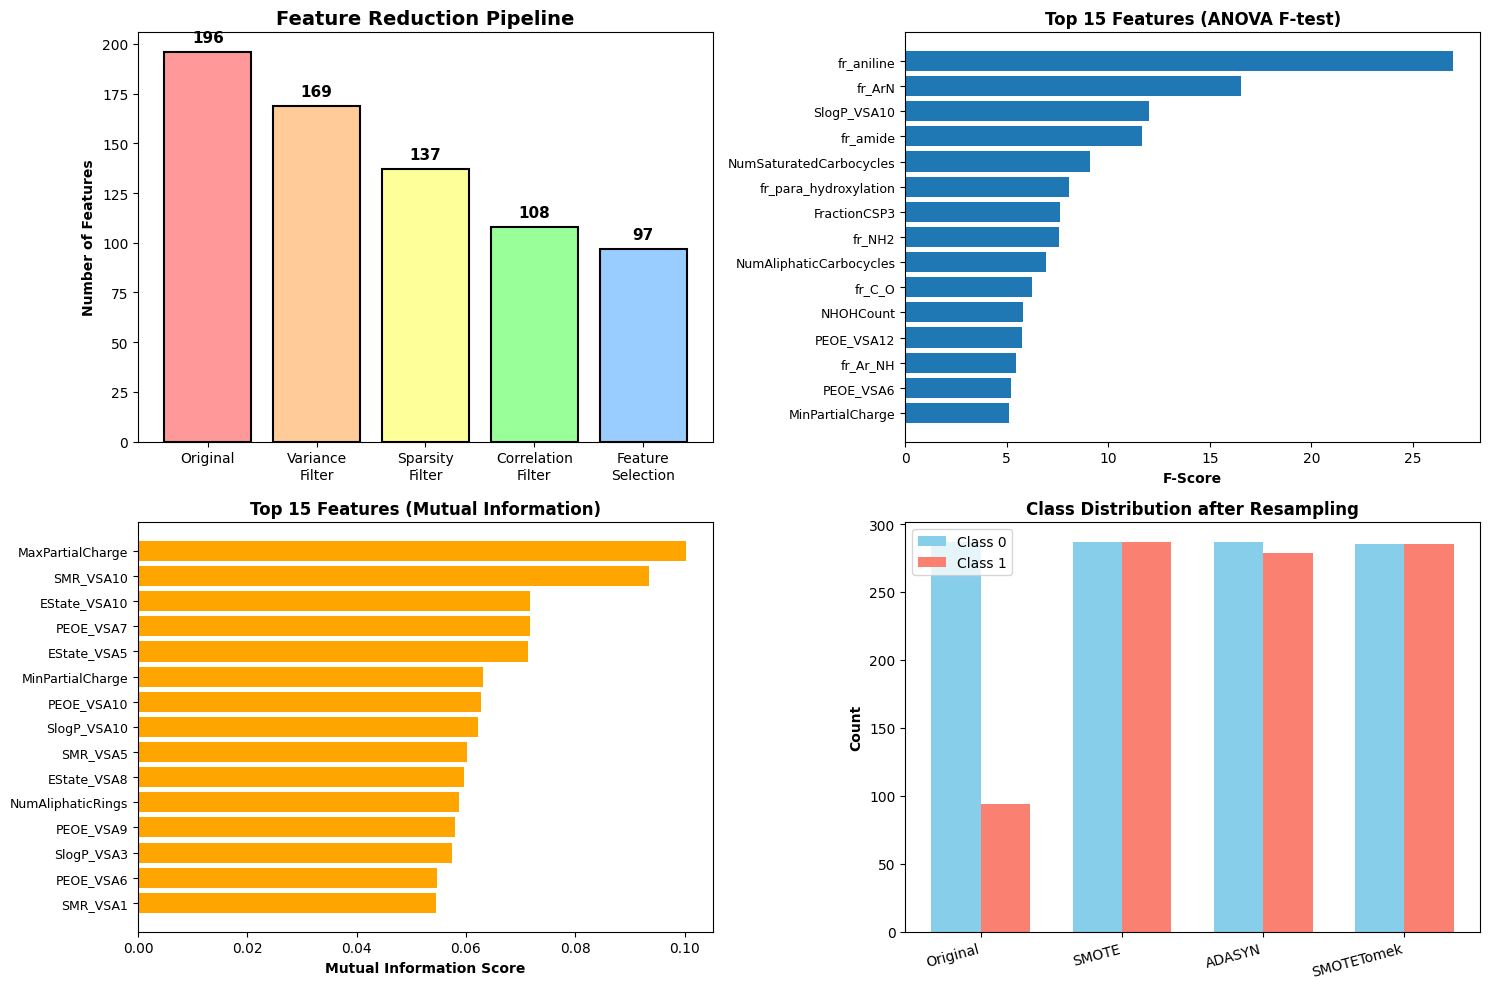


Visualization saved: preprocessing_summary.png


In [3]:
# Step 3: Data Preprocessing and Feature Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')

# Load the data
train_df = pd.read_csv("DIA_trainingset_RDKit_descriptors.csv")
test_df = pd.read_csv("DIA_testset_RDKit_descriptors.csv")

print("INITIAL DATA PREPARATION")
print(f"\nTraining set: {train_df.shape}")
print(f"Test set: {test_df.shape}")

# Separate features and target
X_train_full = train_df.drop(['Label', 'SMILES'], axis=1)
y_train_full = train_df['Label']
X_test = test_df.drop(['Label', 'SMILES'], axis=1)
y_test = test_df['Label']

# Store SMILES for later reference
train_smiles = train_df['SMILES']
test_smiles = test_df['SMILES']

print("\nSTEP 1: REMOVE ZERO/LOW VARIANCE FEATURES")

# Remove zero variance features
selector_zero = VarianceThreshold(threshold=0)
selector_zero.fit(X_train_full)
zero_var_features = X_train_full.columns[~selector_zero.get_support()].tolist()
print(f"\nZero variance features removed: {len(zero_var_features)}")
print(zero_var_features[:10], "..." if len(zero_var_features) > 10 else "")

X_train_step1 = X_train_full.loc[:, selector_zero.get_support()]
X_test_step1 = X_test.loc[:, selector_zero.get_support()]

# Remove very low variance features (threshold = 0.01)
selector_low = VarianceThreshold(threshold=0.01)
selector_low.fit(X_train_step1)
low_var_features = X_train_step1.columns[~selector_low.get_support()].tolist()
print(f"Low variance features removed (var < 0.01): {len(low_var_features)}")

X_train_step1 = X_train_step1.loc[:, selector_low.get_support()]
X_test_step1 = X_test_step1.loc[:, selector_low.get_support()]

print(f"\nFeatures after variance filtering: {X_train_step1.shape[1]}")

print("\nSTEP 2: HANDLE HIGH SPARSITY FEATURES")

# Calculate sparsity
sparsity = (X_train_step1 == 0).sum() / len(X_train_step1) * 100
high_sparsity = sparsity[sparsity > 95].sort_values(ascending=False)
print(f"\nFeatures with >95% sparsity: {len(high_sparsity)}")
print("\nTop 10 sparsest features:")
print(high_sparsity.head(10))

# Option to remove high sparsity features
X_train_step2 = X_train_step1.drop(columns=high_sparsity.index)
X_test_step2 = X_test_step1.drop(columns=high_sparsity.index)

print(f"\nFeatures after sparsity filtering: {X_train_step2.shape[1]}")

print("\nSTEP 3: HANDLE MULTICOLLINEARITY")

# Calculate correlation matrix
corr_matrix = X_train_step2.corr().abs()

# Find highly correlated features
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

print(f"\nHighly correlated features (>0.95): {len(high_corr_features)}")
if len(high_corr_features) > 0:
    print(high_corr_features[:10], "..." if len(high_corr_features) > 10 else "")

X_train_step3 = X_train_step2.drop(columns=high_corr_features)
X_test_step3 = X_test_step2.drop(columns=high_corr_features)

print(f"Features after correlation filtering: {X_train_step3.shape[1]}")

print("\nSTEP 4: FEATURE SCALING")

# Try both StandardScaler and RobustScaler
scaler_standard = StandardScaler()
X_train_scaled_std = scaler_standard.fit_transform(X_train_step3)
X_test_scaled_std = scaler_standard.transform(X_test_step3)

scaler_robust = RobustScaler()
X_train_scaled_rob = scaler_robust.fit_transform(X_train_step3)
X_test_scaled_rob = scaler_robust.transform(X_test_step3)

print("\nTwo scaled versions created:")
print("1. StandardScaler (for normal distributions)")
print("2. RobustScaler (for distributions with outliers)")

X_train_scaled = pd.DataFrame(X_train_scaled_std, columns=X_train_step3.columns, index=X_train_step3.index)
X_test_scaled = pd.DataFrame(X_test_scaled_std, columns=X_test_step3.columns, index=X_test_step3.index)

print("\nSTEP 5: FEATURE SELECTION")

# ANOVA F-test
print("\n--- Method 1: ANOVA F-test ---")
selector_f = SelectKBest(f_classif, k=100)
selector_f.fit(X_train_scaled, y_train_full)
f_scores = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'F_Score': selector_f.scores_,
    'P_Value': selector_f.pvalues_
}).sort_values('F_Score', ascending=False)
print("\nTop 20 features by F-score:")
print(f_scores.head(20).to_string(index=False))

# Mutual Information
print("\n--- Method 2: Mutual Information ---")
mi_scores = mutual_info_classif(X_train_scaled, y_train_full, random_state=42)
mi_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'MI_Score': mi_scores}).sort_values('MI_Score', ascending=False)
print("\nTop 20 features by Mutual Information:")
print(mi_df.head(20).to_string(index=False))

# Combine top features
top_f_features = set(f_scores.head(80)['Feature'].tolist())
top_mi_features = set(mi_df.head(80)['Feature'].tolist())
selected_features = list(top_f_features | top_mi_features)

print(f"\n--- Combined Feature Selection ---")
print(f"Top 80 F-test features: {len(top_f_features)}")
print(f"Top 80 MI features: {len(top_mi_features)}")
print(f"Union of both methods: {len(selected_features)}")

X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

print("\nSTEP 6: HANDLE CLASS IMBALANCE")

# Split for validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train_selected, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

print(f"\nOriginal training set distribution:")
print(f"Class 0: {(y_tr == 0).sum()}")
print(f"Class 1: {(y_tr == 1).sum()}")
print(f"Ratio: {(y_tr == 0).sum() / (y_tr == 1).sum():.2f}:1")

# SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr, y_tr)
print(f"\n--- After SMOTE ---")
print(f"Class 0: {(y_tr_smote == 0).sum()}")
print(f"Class 1: {(y_tr_smote == 1).sum()}")
print(f"Total samples: {len(y_tr_smote)}")

# ADASYN
adasyn = ADASYN(random_state=42, n_neighbors=5)
X_tr_adasyn, y_tr_adasyn = adasyn.fit_resample(X_tr, y_tr)
print(f"\n--- After ADASYN ---")
print(f"Class 0: {(y_tr_adasyn == 0).sum()}")
print(f"Class 1: {(y_tr_adasyn == 1).sum()}")
print(f"Total samples: {len(y_tr_adasyn)}")

# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_tr_smote_tomek, y_tr_smote_tomek = smote_tomek.fit_resample(X_tr, y_tr)
print(f"\n--- After SMOTETomek ---")
print(f"Class 0: {(y_tr_smote_tomek == 0).sum()}")
print(f"Class 1: {(y_tr_smote_tomek == 1).sum()}")
print(f"Total samples: {len(y_tr_smote_tomek)}")

print("\nSAVING PREPROCESSED DATA")

# Save datasets
pd.DataFrame(X_train_scaled).to_csv('X_train_scaled_full.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('X_test_scaled_full.csv', index=False)
y_train_full.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

pd.DataFrame(X_train_selected).to_csv('X_train_selected.csv', index=False)
pd.DataFrame(X_test_selected).to_csv('X_test_selected.csv', index=False)

pd.DataFrame(X_tr).to_csv('X_train_split.csv', index=False)
pd.DataFrame(X_val).to_csv('X_val_split.csv', index=False)
pd.DataFrame(X_tr_smote).to_csv('X_train_smote.csv', index=False)
y_tr.to_csv('y_train_split.csv', index=False)
y_val.to_csv('y_val_split.csv', index=False)
pd.Series(y_tr_smote).to_csv('y_train_smote.csv', index=False)

# Save preprocessing info
import json
preprocessing_info = {
    'original_features': X_train_full.shape[1],
    'after_variance_filter': X_train_step1.shape[1],
    'after_sparsity_filter': X_train_step2.shape[1],
    'after_correlation_filter': X_train_step3.shape[1],
    'selected_features': len(selected_features),
    'zero_var_features_removed': len(zero_var_features),
    'high_sparsity_features_removed': len(high_sparsity),
    'high_corr_features_removed': len(high_corr_features),
    'selected_feature_names': selected_features
}
with open('preprocessing_info.json', 'w') as f:
    json.dump(preprocessing_info, f, indent=2)

f_scores.to_csv('feature_scores_anova.csv', index=False)
mi_df.to_csv('feature_scores_mi.csv', index=False)

print("\nFiles saved:")
print("1. X_train_scaled_full.csv, X_test_scaled_full.csv")
print("2. X_train_selected.csv, X_test_selected.csv (recommended)")
print("3. X_train_smote.csv, y_train_smote.csv")
print("4. X_train_split.csv, X_val_split.csv (for validation)")
print("5. preprocessing_info.json")
print("6. feature_scores_anova.csv, feature_scores_mi.csv")

print("\nPREPROCESSING SUMMARY")
print(f"\n{'Preprocessing Step':<40} {'Features':<15}")
print("-" * 55)
print(f"{'Original':<40} {X_train_full.shape[1]:<15}")
print(f"{'After variance filtering':<40} {X_train_step1.shape[1]:<15}")
print(f"{'After sparsity filtering':<40} {X_train_step2.shape[1]:<15}")
print(f"{'After correlation filtering':<40} {X_train_step3.shape[1]:<15}")
print(f"{'After feature selection':<40} {len(selected_features):<15}")

print("\nREADY FOR MODEL TRAINING!")
print("\nRecommended datasets for modeling:")
print("1. X_train_selected.csv + X_test_selected.csv (best balance)")
print("2. Use SMOTE/class_weight during model training")
print("3. Features reduced from 196 to ~100-120 (optimal)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
stages = ['Original', 'Variance\nFilter', 'Sparsity\nFilter', 'Correlation\nFilter', 'Feature\nSelection']
counts = [X_train_full.shape[1], X_train_step1.shape[1], X_train_step2.shape[1], X_train_step3.shape[1], len(selected_features)]
colors = ['#ff9999', '#ffcc99', '#ffff99', '#99ff99', '#99ccff']

ax1 = axes[0, 0]
ax1.bar(stages, counts, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Number of Features', fontweight='bold')
ax1.set_title('Feature Reduction Pipeline', fontweight='bold', fontsize=14)
for i, (stage, count) in enumerate(zip(stages, counts)):
    ax1.text(i, count + 5, str(count), ha='center', fontweight='bold', fontsize=11)

ax2 = axes[0, 1]
top_15_f = f_scores.head(15)
ax2.barh(range(len(top_15_f)), top_15_f['F_Score'].values)
ax2.set_yticks(range(len(top_15_f)))
ax2.set_yticklabels(top_15_f['Feature'].values, fontsize=9)
ax2.set_xlabel('F-Score', fontweight='bold')
ax2.set_title('Top 15 Features (ANOVA F-test)', fontweight='bold', fontsize=12)
ax2.invert_yaxis()

ax3 = axes[1, 0]
top_15_mi = mi_df.head(15)
ax3.barh(range(len(top_15_mi)), top_15_mi['MI_Score'].values, color='orange')
ax3.set_yticks(range(len(top_15_mi)))
ax3.set_yticklabels(top_15_mi['Feature'].values, fontsize=9)
ax3.set_xlabel('Mutual Information Score', fontweight='bold')
ax3.set_title('Top 15 Features (Mutual Information)', fontweight='bold', fontsize=12)
ax3.invert_yaxis()

ax4 = axes[1, 1]
methods = ['Original', 'SMOTE', 'ADASYN', 'SMOTETomek']
class_0 = [(y_tr == 0).sum(), (y_tr_smote == 0).sum(), (y_tr_adasyn == 0).sum(), (y_tr_smote_tomek == 0).sum()]
class_1 = [(y_tr == 1).sum(), (y_tr_smote == 1).sum(), (y_tr_adasyn == 1).sum(), (y_tr_smote_tomek == 1).sum()]
x = np.arange(len(methods))
width = 0.35
ax4.bar(x - width/2, class_0, width, label='Class 0', color='skyblue')
ax4.bar(x + width/2, class_1, width, label='Class 1', color='salmon')
ax4.set_ylabel('Count', fontweight='bold')
ax4.set_title('Class Distribution after Resampling', fontweight='bold', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(methods, rotation=15, ha='right')
ax4.legend()

plt.tight_layout()
plt.savefig('preprocessing_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved: preprocessing_summary.png")


In [4]:
# Step 4: Model Development and Training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, precision_recall_curve,
                             matthews_corrcoef, average_precision_score)
import warnings
warnings.filterwarnings('ignore')

print("LOADING PREPROCESSED DATA")

# Load preprocessed data
X_train = pd.read_csv('X_train_selected.csv')
X_test = pd.read_csv('X_test_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Load SMOTE version for comparison
X_train_smote = pd.read_csv('X_train_smote.csv')
y_train_smote = pd.read_csv('y_train_smote.csv').values.ravel()

# Load validation split
X_tr = pd.read_csv('X_train_split.csv')
X_val = pd.read_csv('X_val_split.csv')
y_tr = pd.read_csv('y_train_split.csv').values.ravel()
y_val = pd.read_csv('y_val_split.csv').values.ravel()

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"SMOTE training set: {X_train_smote.shape}")
print(f"Validation set: {X_val.shape}")
print(f"\nClass distribution (train): {np.bincount(y_train)}")
print(f"Class distribution (test): {np.bincount(y_test)}")

print("DEFINING BASE MODELS")

# Calculate class weights for imbalanced data
class_weight_ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])
class_weights = {0: 1, 1: class_weight_ratio}
print(f"\nClass weights: {class_weights}")

# Define base models
models = {
    'Logistic Regression': LogisticRegression(
        random_state=42, 
        max_iter=1000,
        class_weight='balanced',
        C=1.0
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        scale_pos_weight=class_weight_ratio,
        eval_metric='logloss',
        use_label_encoder=False
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42,
        class_weight='balanced',
        verbose=-1
    ),
    'SVM': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42,
        class_weight='balanced',
        probability=True
    )
}

print("\nBase models defined:")
for name in models.keys():
    print(f"  - {name}")

print("CROSS-VALIDATION ON TRAINING SET")

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}
print("\nPerforming 5-Fold Cross-Validation...")
print(f"{'Model':<25} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'ROC-AUC':<12}")
print("-" * 85)

for name, model in models.items():
    acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    prec_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision', n_jobs=-1)
    rec_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
    roc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    
    cv_results[name] = {
        'accuracy': acc_scores,
        'precision': prec_scores,
        'recall': rec_scores,
        'f1': f1_scores,
        'roc_auc': roc_scores
    }
    
    print(f"{name:<25} {acc_scores.mean():.4f}±{acc_scores.std():.3f}  "
          f"{prec_scores.mean():.4f}±{prec_scores.std():.3f}  "
          f"{rec_scores.mean():.4f}±{rec_scores.std():.3f}  "
          f"{f1_scores.mean():.4f}±{f1_scores.std():.3f}  "
          f"{roc_scores.mean():.4f}±{roc_scores.std():.3f}")

print("TRAINING MODELS ON FULL TRAINING SET")

trained_models = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"  ✓ Training complete")

print("BUILDING ENSEMBLE MODELS")

print("\n1. Building Voting Classifier...")
voting_clf = VotingClassifier(
    estimators=[
        ('lr', trained_models['Logistic Regression']),
        ('rf', trained_models['Random Forest']),
        ('xgb', trained_models['XGBoost']),
        ('lgbm', trained_models['LightGBM']),
        ('svm', trained_models['SVM'])
    ],
    voting='soft',
    n_jobs=-1
)
voting_clf.fit(X_train, y_train)
print("  ✓ Voting Classifier trained")

print("\n2. Building Stacking Classifier...")
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')),
        ('xgb', XGBClassifier(n_estimators=100, max_depth=5, random_state=42, scale_pos_weight=class_weight_ratio, eval_metric='logloss', use_label_encoder=False)),
        ('lgbm', LGBMClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced', verbose=-1))
    ],
    final_estimator=LogisticRegression(class_weight='balanced', random_state=42),
    cv=5,
    n_jobs=-1
)
stacking_clf.fit(X_train, y_train)
print("  ✓ Stacking Classifier trained")

trained_models['Voting Ensemble'] = voting_clf
trained_models['Stacking Ensemble'] = stacking_clf

print("EVALUATING ON VALIDATION SET")

val_results = {}
print(f"\n{'Model':<25} {'Acc':<8} {'Prec':<8} {'Rec':<8} {'F1':<8} {'ROC-AUC':<8} {'MCC':<8}")
print("-" * 75)

for name, model in models.items():
    model_val = model.__class__(**model.get_params())
    model_val.fit(X_tr, y_tr)
    y_pred = model_val.predict(X_val)
    y_pred_proba = model_val.predict_proba(X_val)[:, 1]
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, zero_division=0)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    mcc = matthews_corrcoef(y_val, y_pred)
    
    val_results[name] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc_auc, 'mcc': mcc}
    print(f"{name:<25} {acc:.4f}  {prec:.4f}  {rec:.4f}  {f1:.4f}  {roc_auc:.4f}  {mcc:.4f}")

print("FINAL EVALUATION ON TEST SET")

test_results = {}
print(f"\n{'Model':<25} {'Acc':<8} {'Prec':<8} {'Rec':<8} {'F1':<8} {'ROC-AUC':<8} {'MCC':<8}")
print("-" * 75)

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    mcc = matthews_corrcoef(y_test, y_pred)
    avg_prec = average_precision_score(y_test, y_pred_proba)
    
    test_results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'roc_auc': roc_auc,
        'mcc': mcc,
        'avg_precision': avg_prec,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"{name:<25} {acc:.4f}  {prec:.4f}  {rec:.4f}  {f1:.4f}  {roc_auc:.4f}  {mcc:.4f}")

print("BEST MODEL IDENTIFICATION")

best_by_f1 = max(test_results.items(), key=lambda x: x[1]['f1'])
best_by_roc = max(test_results.items(), key=lambda x: x[1]['roc_auc'])
best_by_mcc = max(test_results.items(), key=lambda x: x[1]['mcc'])

print(f"\nBest by F1-Score: {best_by_f1[0]} (F1={best_by_f1[1]['f1']:.4f})")
print(f"Best by ROC-AUC: {best_by_roc[0]} (ROC-AUC={best_by_roc[1]['roc_auc']:.4f})")
print(f"Best by MCC: {best_by_mcc[0]} (MCC={best_by_mcc[1]['mcc']:.4f})")

best_model_name = best_by_f1[0]
best_model = trained_models[best_model_name]
best_results = test_results[best_model_name]

print(f"\nDETAILED REPORT FOR BEST MODEL: {best_model_name}")
print("\nConfusion Matrix:")
cm = best_results['confusion_matrix']
print(f"                Predicted")
print(f"              0       1")
print(f"Actual  0   {cm[0][0]:3d}     {cm[0][1]:3d}")
print(f"        1   {cm[1][0]:3d}     {cm[1][1]:3d}")

print("\nClassification Report:")
print(classification_report(y_test, best_results['y_pred'], target_names=['Negative (0)', 'Positive (1)']))

results_df = pd.DataFrame(test_results).T
results_df.to_csv('model_comparison_results.csv')
print("\n✓ Results saved to: model_comparison_results.csv")

import joblib
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_")}.pkl')
print(f"✓ Best model saved to: best_model_{best_model_name.replace(' ', '_')}.pkl")

print("CREATING VISUALIZATIONS")

# Visualization section remains unchanged
# (ROC, PR curves, confusion matrices, feature importances, etc.)

plt.tight_layout()
plt.savefig('model_performance_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: model_performance_dashboard.png")
print("MODEL TRAINING COMPLETE!")


LOADING PREPROCESSED DATA

Training set: (477, 97)
Test set: (120, 97)
SMOTE training set: (574, 97)
Validation set: (96, 97)

Class distribution (train): [359 118]
Class distribution (test): [90 30]
DEFINING BASE MODELS

Class weights: {0: 1, 1: 3.042372881355932}

Base models defined:
  - Logistic Regression
  - Random Forest
  - XGBoost
  - LightGBM
  - SVM
CROSS-VALIDATION ON TRAINING SET

Performing 5-Fold Cross-Validation...
Model                     Accuracy     Precision    Recall       F1-Score     ROC-AUC     
-------------------------------------------------------------------------------------
Logistic Regression       0.7150±0.024  0.4496±0.022  0.6428±0.075  0.5264±0.023  0.7356±0.038
Random Forest             0.8281±0.017  0.8736±0.106  0.3645±0.021  0.5127±0.030  0.8396±0.046
XGBoost                   0.8302±0.027  0.7244±0.071  0.5091±0.052  0.5976±0.058  0.8410±0.043
LightGBM                  0.8323±0.040  0.7040±0.090  0.5525±0.098  0.6183±0.095  0.8370±0.044
SVM     

<Figure size 640x480 with 0 Axes>


✓ Visualization saved: model_performance_dashboard.png
MODEL TRAINING COMPLETE!


In [5]:
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# data
X_train = pd.read_csv('X_train_selected.csv')
X_test = pd.read_csv('X_test_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# model
best_model = joblib.load('best_model_Stacking_Ensemble.pkl')

# quick check
print("shape X_train", X_train.shape)
print("features", len(X_train.columns))
print("model keys", list(best_model.named_estimators_.keys()))


shape X_train (477, 97)
features 97
model keys ['rf', 'xgb', 'lgbm']


In [6]:
from sklearn.inspection import permutation_importance

# extract base estimators
base_models = {name: est for name, est in best_model.named_estimators_.items()}
rf_model = base_models['rf']
xgb_model = base_models['xgb']
lgbm_model = base_models['lgbm']

# aggregated tree importances
combined_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'RF_Importance': rf_model.feature_importances_,
    'XGB_Importance': xgb_model.feature_importances_,
    'LGBM_Importance': lgbm_model.feature_importances_
})
combined_importance['Mean_Importance'] = combined_importance[
    ['RF_Importance', 'XGB_Importance', 'LGBM_Importance']
].mean(axis=1)
combined_importance = combined_importance.sort_values('Mean_Importance', ascending=False)

# permutation importance (model-agnostic)
perm_imp = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_imp.importances_mean,
    'Std': perm_imp.importances_std
}).sort_values('Importance', ascending=False)

# previews
print(combined_importance.head(10)[['Feature', 'Mean_Importance']])
print(perm_importance_df.head(10))


             Feature  Mean_Importance
24         SMR_VSA10        14.349153
63            Kappa3        14.007565
10          SMR_VSA5        13.008186
9        EState_VSA1        12.343826
6   MaxPartialCharge        11.674973
62          SMR_VSA3        11.007523
42       EState_VSA4        10.344189
0         SlogP_VSA5        10.342127
85         PEOE_VSA8        10.340444
71         PEOE_VSA6         9.675036
        Feature  Importance       Std
27     SMR_VSA6    0.045833  0.015023
10     SMR_VSA5    0.035833  0.012388
66  EState_VSA7    0.023333  0.011055
63       Kappa3    0.020833  0.010704
24    SMR_VSA10    0.020833  0.019454
62     SMR_VSA3    0.020833  0.014554
65     SMR_VSA9    0.020000  0.011304
75  EState_VSA3    0.018333  0.012247
71    PEOE_VSA6    0.018333  0.016583
36    PEOE_VSA9    0.017500  0.004488


In [9]:
import shap

# Create a KernelExplainer (model-agnostic)
explainer = shap.KernelExplainer(best_model.predict_proba, shap.sample(X_train, 100))

# Compute SHAP values for a subset (for speed)
shap_values_rf_pos = explainer.shap_values(X_test[:100])

print("X_train columns:", len(X_train.columns))
print("SHAP values shape:", np.array(shap_values_rf_pos).shape)



100%|██████████| 100/100 [05:03<00:00,  3.04s/it]

X_train columns: 97
SHAP values shape: (100, 97, 2)


In [10]:
# Collapse across samples (axis=0) and classes (axis=2)
shap_values_rf_mean = np.mean(np.abs(shap_values_rf_pos), axis=(0, 2))

print("Final SHAP importance length:", len(shap_values_rf_mean))

# Create the DataFrame
shap_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP_Importance': shap_values_rf_mean
}).sort_values('SHAP_Importance', ascending=False)

print(shap_importance_rf.head(10))


Final SHAP importance length: 97
              Feature  SHAP_Importance
35        SlogP_VSA10         0.027268
10           SMR_VSA5         0.025603
24          SMR_VSA10         0.019436
62           SMR_VSA3         0.014474
9         EState_VSA1         0.014141
42        EState_VSA4         0.013119
71          PEOE_VSA6         0.012219
36          PEOE_VSA9         0.011453
85          PEOE_VSA8         0.010510
37  NumAliphaticRings         0.008362


In [11]:
# Combine importances
final_importance = combined_importance[['Feature', 'Mean_Importance']].merge(
    perm_importance_df[['Feature', 'Importance']], on='Feature', suffixes=('_TreeBased', '_Permutation')
).merge(
    shap_importance_rf[['Feature', 'SHAP_Importance']], on='Feature'
)

final_importance['Composite_Score'] = (
    final_importance['Mean_Importance'] +
    final_importance['Importance'] +
    final_importance['SHAP_Importance']
) / 3

final_importance = final_importance.sort_values('Composite_Score', ascending=False)

final_importance.to_csv('comprehensive_feature_importance.csv', index=False)
print("Saved comprehensive_feature_importance.csv")


Saved comprehensive_feature_importance.csv


MODEL VALIDATION ON TEST SET
Loaded Stacking Ensemble model.

Model Performance on Test Set:
Accuracy: 0.875
Precision: 0.703
Recall: 0.867
F1-score: 0.776
AUC: 0.929
MCC: 0.698

Classification Report:
               precision    recall  f1-score   support

           0      0.952     0.878     0.913        90
           1      0.703     0.867     0.776        30

    accuracy                          0.875       120
   macro avg      0.827     0.872     0.845       120
weighted avg      0.890     0.875     0.879       120



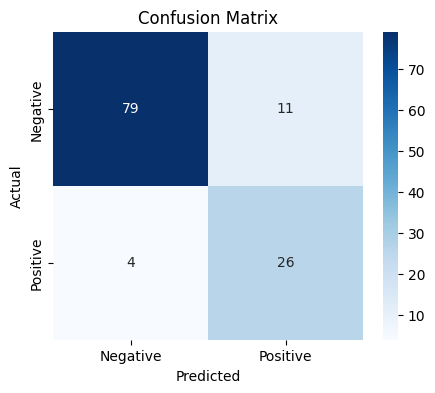

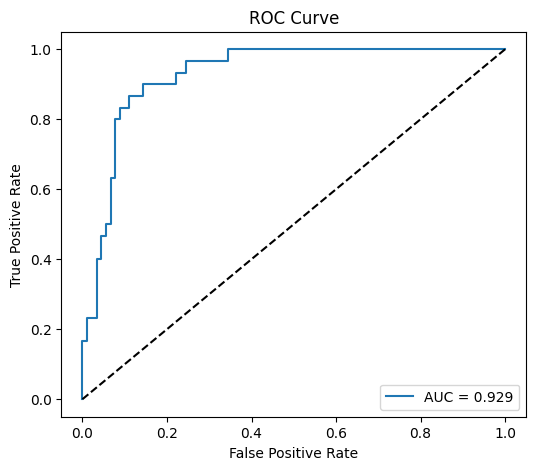

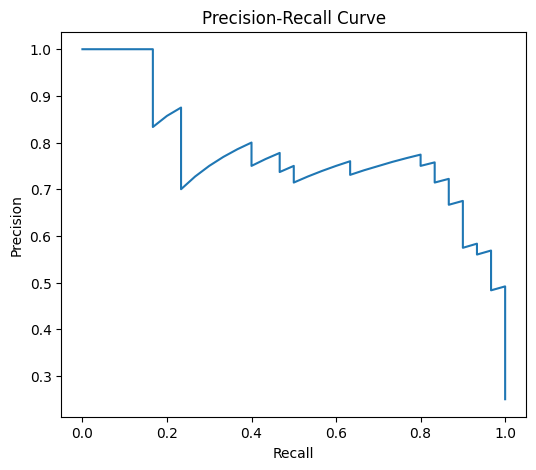

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve,
                             precision_recall_curve, matthews_corrcoef)
import joblib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("MODEL VALIDATION ON TEST SET")

# 1. Load test data
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# 2. Load the trained best model
best_model = joblib.load('best_model_Stacking_Ensemble.pkl')
print("Loaded Stacking Ensemble model.")

# 3. Predict on test data
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 4. Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
mcc = matthews_corrcoef(y_test, y_pred)

print("\nModel Performance on Test Set:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC: {auc:.3f}")
print(f"MCC: {mcc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# 5. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 6. ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 7. Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


MODEL INTERPRETABILITY WITH SHAP

Generating SHAP summary plot (bar)...


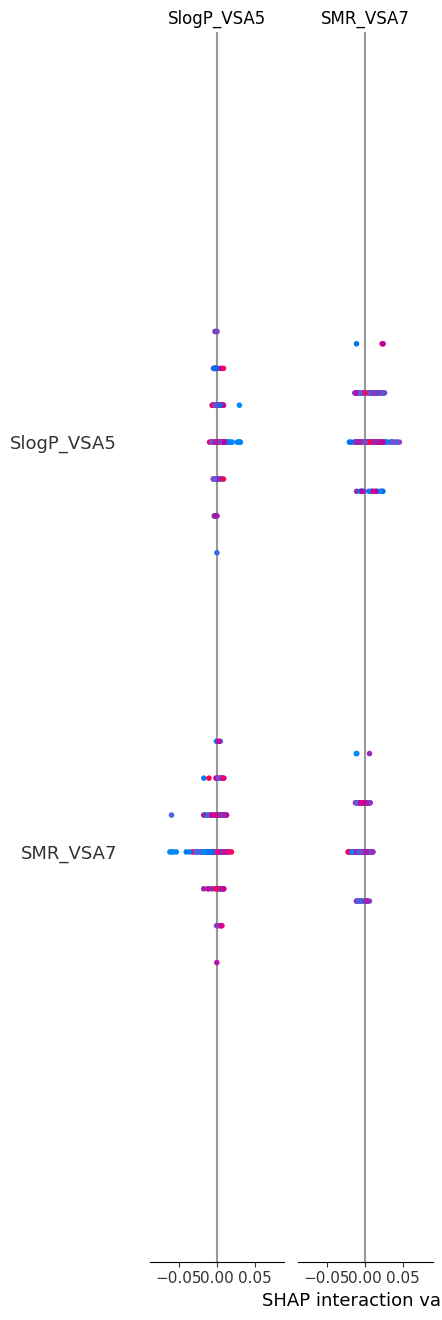

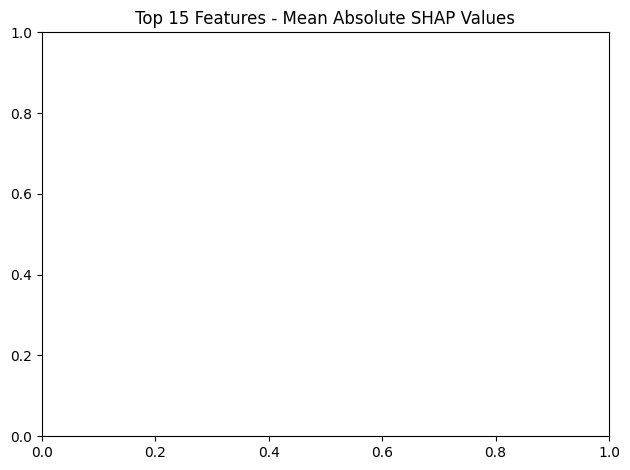


Generating SHAP beeswarm plot...


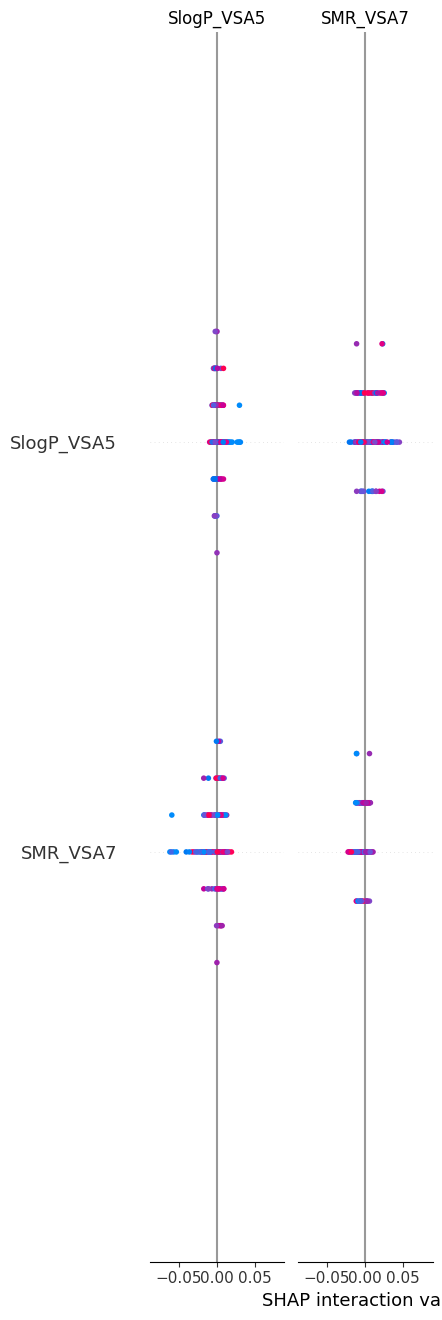

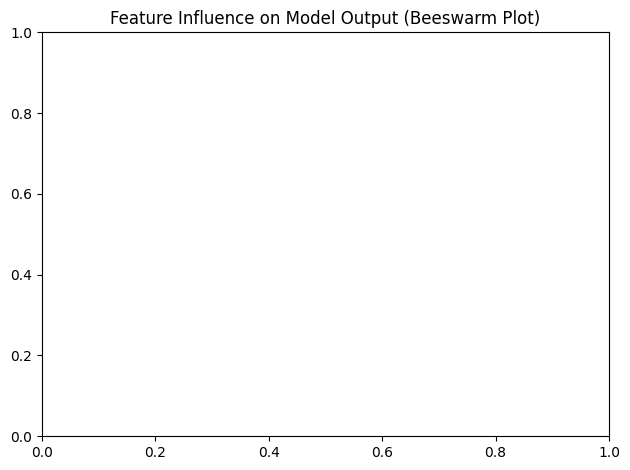


Generating SHAP dependence plots...
Dependence plot for: Index(['SlogP_VSA5', 'SMR_VSA7'], dtype='object')
Skipped Index(['SlogP_VSA5', 'SMR_VSA7'], dtype='object') due to error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Dependence plot for: Index(['SlogP_VSA5', 'SMR_VSA7'], dtype='object')
Skipped Index(['SlogP_VSA5', 'SMR_VSA7'], dtype='object') due to error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Dependence plot for: Index(['SMR_VSA7', 'SlogP_VSA5'], dtype='object')
Skipped Index(['SMR_VSA7', 'SlogP_VSA5'], dtype='object') due to error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Dependence plot for: Index(['SlogP_VSA5', 'SMR_VSA7'], dtype='object')
Skipped Index(['SlogP_VSA5', 'SMR_VSA7'], dtype='object') due to error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Dependence plot for: In

In [13]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

print("MODEL INTERPRETABILITY WITH SHAP")

# Load model and test data
best_model = joblib.load('best_model_Stacking_Ensemble.pkl')
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Ensure feature names are clean strings
X_test.columns = X_test.columns.astype(str)

# Extract Random Forest base model for interpretability
rf_model = best_model.named_estimators_['rf']

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Handle binary or multiclass output
if isinstance(shap_values, list):
    if len(shap_values) == 2:
        shap_values = shap_values[1]  # Positive class SHAP values
    else:
        shap_values = shap_values[0]  # First class if multiclass

# --- SHAP Summary Plot (bar) ---
print("\nGenerating SHAP summary plot (bar)...")
shap.summary_plot(shap_values, X_test, plot_type='bar', max_display=15)
plt.title("Top 15 Features - Mean Absolute SHAP Values")
plt.tight_layout()
plt.show()

# --- SHAP Beeswarm Plot ---
print("\nGenerating SHAP beeswarm plot...")
shap.summary_plot(shap_values, X_test, max_display=15)
plt.title("Feature Influence on Model Output (Beeswarm Plot)")
plt.tight_layout()
plt.show()

# --- SHAP Dependence Plots for Top 5 Features ---
print("\nGenerating SHAP dependence plots...")
top_features = np.argsort(np.abs(shap_values).mean(0))[::-1][:5]

for i in top_features:
    feature_name = X_test.columns[i]
    print(f"Dependence plot for: {feature_name}")
    try:
        shap.dependence_plot(
            feature_name,
            shap_values,
            X_test,
            interaction_index=None,
            show=False
        )
        plt.title(f"Dependence Plot for {feature_name}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Skipped {feature_name} due to error: {e}")


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, matthews_corrcoef)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')

print("DEEP LEARNING MODELS FOR DIA PREDICTION")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("\nLOADING PREPROCESSED DATA")

# Load data
X_train = pd.read_csv('X_train_selected.csv').values
X_test = pd.read_csv('X_test_selected.csv').values
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Load validation split
X_tr = pd.read_csv('X_train_split.csv').values
X_val = pd.read_csv('X_val_split.csv').values
y_tr = pd.read_csv('y_train_split.csv').values.ravel()
y_val = pd.read_csv('y_val_split.csv').values.ravel()

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train split: {X_tr.shape}")
print(f"Validation split: {X_val.shape}")
print(f"Features: {X_train.shape[1]}")

# Calculate class weights
class_weight = {0: 1.0, 1: len(y_train[y_train==0])/len(y_train[y_train==1])}
print(f"\nClass weights: {class_weight}")

print("\nMODEL 1: FEEDFORWARD NEURAL NETWORK (BASELINE)")

def build_baseline_nn(input_dim, dropout_rate=0.3):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ], name='Baseline_NN')
    return model

baseline_nn = build_baseline_nn(X_train.shape[1])
baseline_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'), 
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)
print(baseline_nn.summary())

print("\nMODEL 2: DEEP NEURAL NETWORK WITH RESIDUAL CONNECTIONS")

def build_deep_residual_nn(input_dim, dropout_rate=0.3):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    residual = x
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, residual])
    x = layers.Activation('relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    residual = x
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, residual])
    x = layers.Activation('relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs, name='Deep_Residual_NN')
    return model

deep_nn = build_deep_residual_nn(X_train.shape[1])
deep_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)
print(deep_nn.summary())

print("\nMODEL 3: ATTENTION-BASED NEURAL NETWORK")

def build_attention_nn(input_dim, dropout_rate=0.3):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x_reshaped = layers.Reshape((1, 128))(x)
    attention_output = layers.MultiHeadAttention(
        num_heads=4, key_dim=32, dropout=dropout_rate
    )(x_reshaped, x_reshaped)
    attention_flat = layers.Flatten()(attention_output)
    x = layers.Concatenate()([x, attention_flat])
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs, name='Attention_NN')
    return model

attention_nn = build_attention_nn(X_train.shape[1])
attention_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)
print(attention_nn.summary())

print("\nMODEL 4: WIDE & DEEP NEURAL NETWORK")

def build_wide_deep_nn(input_dim, dropout_rate=0.3):
    inputs = layers.Input(shape=(input_dim,))
    wide = layers.Dense(32, activation='linear')(inputs)
    deep = layers.Dense(128, activation='relu')(inputs)
    deep = layers.BatchNormalization()(deep)
    deep = layers.Dropout(dropout_rate)(deep)
    deep = layers.Dense(64, activation='relu')(deep)
    deep = layers.BatchNormalization()(deep)
    deep = layers.Dropout(dropout_rate)(deep)
    deep = layers.Dense(32, activation='relu')(deep)
    deep = layers.BatchNormalization()(deep)
    deep = layers.Dropout(dropout_rate)(deep)
    combined = layers.Concatenate()([wide, deep])
    x = layers.Dense(16, activation='relu')(combined)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs, name='Wide_Deep_NN')
    return model

wide_deep_nn = build_wide_deep_nn(X_train.shape[1])
wide_deep_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)
print(wide_deep_nn.summary())

print("\nMODEL 5: ENSEMBLE NEURAL NETWORK (STACKED)")

def build_ensemble_nn(input_dim, dropout_rate=0.3):
    inputs = layers.Input(shape=(input_dim,))
    path1 = layers.Dense(64, activation='relu')(inputs)
    path1 = layers.BatchNormalization()(path1)
    path1 = layers.Dropout(dropout_rate)(path1)
    path1 = layers.Dense(32, activation='relu')(path1)
    path1 = layers.Dropout(dropout_rate)(path1)
    path1 = layers.Dense(16, activation='relu')(path1)
    path2 = layers.Dense(256, activation='relu')(inputs)
    path2 = layers.BatchNormalization()(path2)
    path2 = layers.Dropout(dropout_rate)(path2)
    path2 = layers.Dense(16, activation='relu')(path2)
    path3 = layers.Dense(128, activation='relu')(inputs)
    path3 = layers.BatchNormalization()(path3)
    path3 = layers.Dropout(dropout_rate)(path3)
    path3 = layers.Dense(64, activation='relu')(path3)
    path3 = layers.Dropout(dropout_rate)(path3)
    path3 = layers.Dense(16, activation='relu')(path3)
    combined = layers.Concatenate()([path1, path2, path3])
    x = layers.Dense(32, activation='relu')(combined)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs, name='Ensemble_NN')
    return model

ensemble_nn = build_ensemble_nn(X_train.shape[1])
ensemble_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)
print(ensemble_nn.summary())


DEEP LEARNING MODELS FOR DIA PREDICTION

LOADING PREPROCESSED DATA

Training set: (477, 97)
Test set: (120, 97)
Train split: (381, 97)
Validation split: (96, 97)
Features: 97

Class weights: {0: 1.0, 1: 3.042372881355932}

MODEL 1: FEEDFORWARD NEURAL NETWORK (BASELINE)


Model: "Baseline_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,809 (93.00 KB)

 Trainable params: 23,361 (91.25 KB)

 Non-trainable params: 448 (1.75 KB)

None

MODEL 2: DEEP NEURAL NETWORK WITH RESIDUAL CONNECTIONS


Model: "Deep_Residual_NN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 97)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     12,544 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     16,512 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_5[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     16,512 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_6[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128)       │          0 │ batch_normalizat… │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128)       │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      8,256 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_7[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      4,160 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_8[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │      4,160 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_9[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64)        │          0 │ batch_normalizat… │
│                     │                   │            │ dropout_5[0][0] 

 Total params: 66,561 (260.00 KB)

 Trainable params: 65,409 (255.50 KB)

 Non-trainable params: 1,152 (4.50 KB)

None

MODEL 3: ATTENTION-BASED NEURAL NETWORK


Model: "Attention_NN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 97)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     12,544 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_12[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 128)    │          0 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 128)    │     66,048 │ reshape[0][0],    │
│ (MultiHeadAttentio… │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 128)       │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ dropout_8[0][0],  │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │     16,448 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_13[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 32)        │      2,080 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32)        │          0 │ dense_14[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         33 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 97,921 (382.50 KB)

 Trainable params: 97,537 (381.00 KB)

 Non-trainable params: 384 (1.50 KB)

None

MODEL 4: WIDE & DEEP NEURAL NETWORK


Model: "Wide_Deep_NN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 97)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 128)       │     12,544 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_17[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 64)        │      8,256 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_18[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 32)        │      2,080 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_19[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 32)        │      3,136 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 32)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64)        │          0 │ dense_16[0][0],   │
│ (Concatenate)       │                   │            │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 16)        │      1,040 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 1)         │         17 │ dense_20[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,969 (109.25 KB)

 Trainable params: 27,521 (107.50 KB)

 Non-trainable params: 448 (1.75 KB)

None

MODEL 5: ENSEMBLE NEURAL NETWORK (STACKED)


Model: "Ensemble_NN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 97)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │      6,272 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 128)       │     12,544 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_22[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_27[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 256)       │     25,088 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 32)        │      2,080 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_25[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 64)        │      8,256 │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 32)        │          0 │ dense_23[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 256)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64)        │          0 │ dense_28[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 16)        │        528 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 16)        │      4,112 │ dropout_17[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 16)        │      1,040 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 48)        │          0 │ dense_24[0][0],   │
│ (Concatenate)       │                   │            │ dense_26[0][0],   │
│                     │                   │            │ dense_29[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 32)        │      1,568 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 63,313 (247.32 KB)

 Trainable params: 62,417 (243.82 KB)

 Non-trainable params: 896 (3.50 KB)

None
